Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [1]:
# your code here
sum = 2;
prePrevious = 1;
previous = 2;

while(prePrevious + previous <= 4000000):
    if((prePrevious + previous) % 2 == 0):
        sum += prePrevious + previous;
    prePrevious, previous = previous, prePrevious + previous

print(sum);

4613732


# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
print(cal.DESCR)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

dataframe = pd.DataFrame(cal.data, columns=cal.feature_names)
print(dataframe.head())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

   Feature  Coefficient
 Intercept     2.072499
  Latitude    -0.900421
 Longitude    -0.870586
    MedInc     0.826248
 AveBedrms     0.290387
  AveRooms    -0.248911
  HouseAge     0.117101
  AveOccup    -0.030564
Population    -0.008643

Metric    Value
  RMSE 0.727313
   MAE 0.535126
   R^2 0.594323

   Feature  Coefficient
 Intercept     2.072499
  Latitude    -0.892686
 Longitude    -0.862783
    MedInc     0.825962
 AveBedrms     0.288315
  AveRooms    -0.247349
  HouseAge     0.117926
  AveOccup    -0.030659
Population    -0.008337

Metric    Value
  RMSE 0.727400
   MAE 0.535153
   R^2 0.594226

   Feature  Coefficient
 Intercept     2.072499
  Latitude    -0.870716
 Longitude    -0.839198
    MedInc     0.811800
 AveBedrms     0.251473
  AveRooms    -0.209899
  HouseAge     0.119783
  AveOccup    -0.028651
Population    -0.004806

Metric    Value
  RMSE 0.728334
   MAE 0.535882
   R^2 0.593183



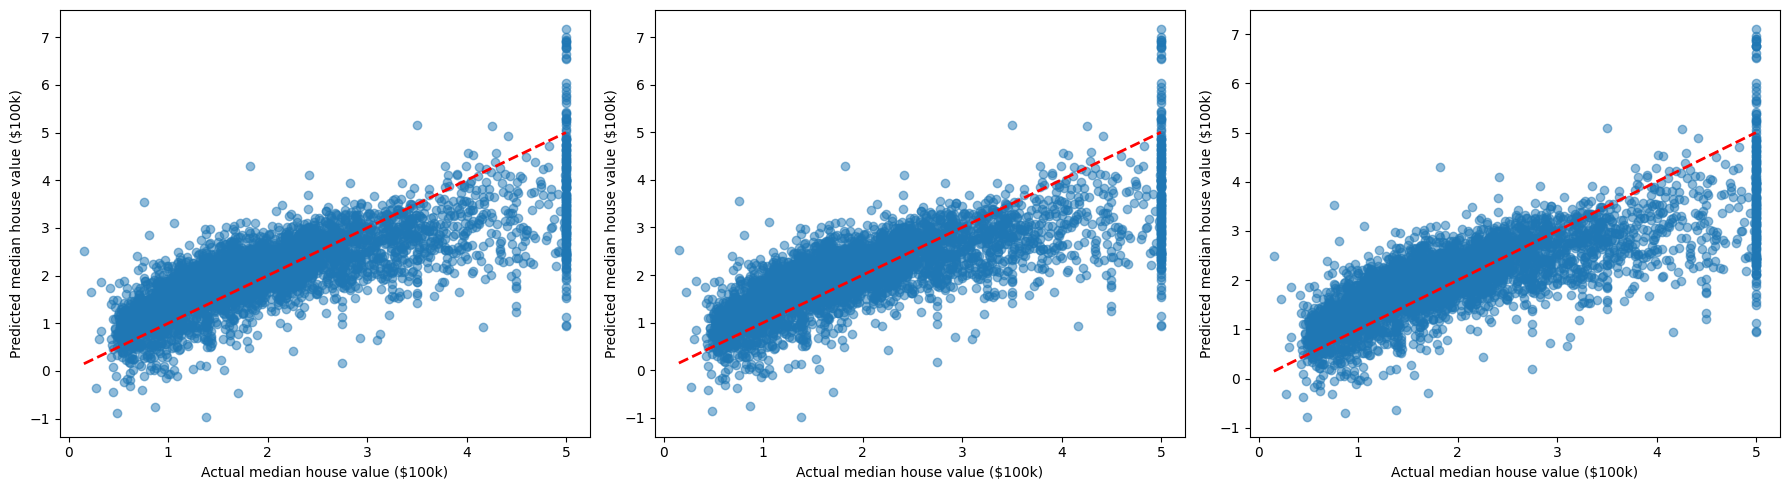

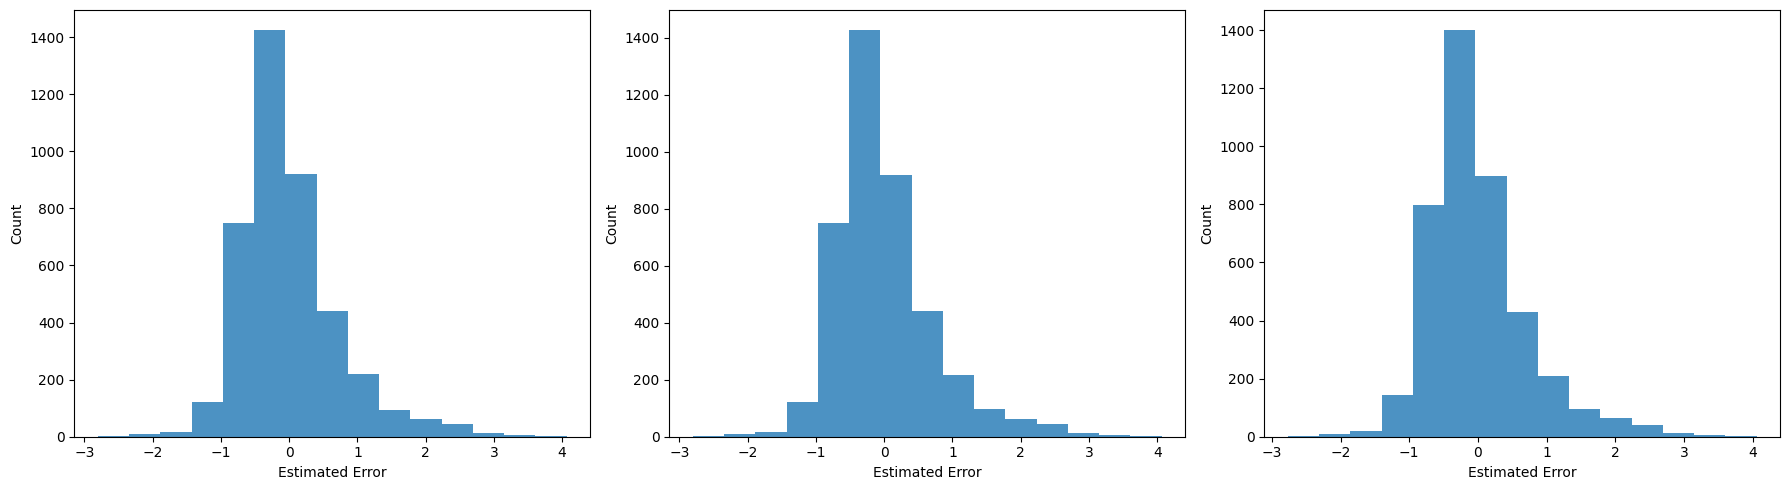

In [11]:
# your code here

cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42)

# ----------- OSL -----------
# linear regression model
model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# table for coefficients
features_df = pd.DataFrame({
    'Feature': ['Intercept'] + X.columns.tolist(),
    'Coefficient': [model.named_steps["model"].intercept_] + list(model.named_steps["model"].coef_)
})
features_df['Abs_Coefficient'] = features_df['Coefficient'].abs()
sorted_coef_df = features_df.sort_values('Abs_Coefficient', ascending=False)

print(sorted_coef_df[['Feature', 'Coefficient']].to_string(index=False))
print()

# table for Model Performance Metrics
#train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
#train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
#train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

metrics = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R^2'],
    'Value': [test_rmse, test_mae, test_r2]
})

print(metrics.to_string(index=False))
print()

# ----------- Ridge Regression -----------
# ridge model
ridge_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RidgeCV(alphas = np.logspace(-4, 1, 60), cv = cv, scoring = "neg_mean_squared_error"))
])
ridge_model.fit(X_train, y_train)

y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)
alpha_ridge = ridge_model.named_steps["model"].alpha_

# table for coefficients
ridge_features_df = pd.DataFrame({
    'Feature': ['Intercept'] + X.columns.tolist(),
    'Coefficient': [ridge_model.named_steps["model"].intercept_] + list(ridge_model.named_steps["model"].coef_)
})
ridge_features_df['Abs_Coefficient'] = ridge_features_df['Coefficient'].abs()
ridge_sorted_coef_df = ridge_features_df.sort_values('Abs_Coefficient', ascending=False)

print(ridge_sorted_coef_df[['Feature', 'Coefficient']].to_string(index = False))
print()

# table for Model Performance Metrics
#ridge_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))
#ridge_train_mae = mean_absolute_error(y_train, y_pred_train_ridge)
ridge_test_mae = mean_absolute_error(y_test, y_pred_test_ridge)
#ridge_train_r2 = r2_score(y_train, y_pred_train_ridge)
ridge_test_r2 = r2_score(y_test, y_pred_test_ridge)

ridge_metrics = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R^2'],
    'Value': [ridge_test_rmse, ridge_test_mae, ridge_test_r2]
})

print(ridge_metrics.to_string(index = False))
print()

# ----------- Lasso Regression -----------
# lasso model
lasso_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LassoCV(alphas = np.logspace(-4, 1, 60), cv = cv, random_state = None))
])
lasso_model.fit(X_train, y_train)

y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_test_lasso = lasso_model.predict(X_test)
alpha_lasso = lasso_model.named_steps["model"].alpha_

# table for coefficients
lasso_features_df = pd.DataFrame({
    'Feature': ['Intercept'] + X.columns.tolist(),
    'Coefficient': [lasso_model.named_steps["model"].intercept_] + list(lasso_model.named_steps["model"].coef_)
})
lasso_features_df['Abs_Coefficient'] = lasso_features_df['Coefficient'].abs()
lasso_sorted_coef_df = lasso_features_df.sort_values('Abs_Coefficient', ascending=False)

print(lasso_sorted_coef_df[['Feature', 'Coefficient']].to_string(index=False))
print()

# table for Model Performance Metrics
#lasso_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))
#lasso_train_mae = mean_absolute_error(y_train, y_pred_train_lasso)
lasso_test_mae = mean_absolute_error(y_test, y_pred_test_lasso)
#lasso_train_r2 = r2_score(y_train, y_pred_train_lasso)
lasso_test_r2 = r2_score(y_test, y_pred_test_lasso)

lasso_metrics = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R^2'],
    'Value': [lasso_test_rmse, lasso_test_mae, lasso_test_r2]
})

print(lasso_metrics.to_string(index=False))
print()

# ----------- scatter plots
# generate a graph with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models = [('Linear Regression', y_pred_test),
          ('Ridge Regression', y_pred_test_ridge),
          ('Lasso Regression', y_pred_test_lasso)]

for index, (name, y_pred) in enumerate(models):
    axes[index].scatter(y_test, y_pred, alpha = 0.5)
    x = np.linspace(y_test.min(), y_test.max(), 200)
    axes[index].plot(x, x, 'r--', lw=2)
    axes[index].set_xlabel('Actual median house value ($100k)')
    axes[index].set_ylabel('Predicted median house value ($100k)')

plt.tight_layout()
plt.show()

# ----------- model err
fig, axes = plt.subplots(1, 3, figsize = (18, 5))

for index, (name, y_pred) in enumerate(models):
    errors = y_test - y_pred
    axes[index].hist(errors, bins = 15, alpha = 0.8)
    axes[index].set_xlabel('Estimated Error')
    axes[index].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, roc_auc_score, average_precision_score,
    confusion_matrix,
    roc_curve, auc, precision_recall_curve,
    precision_recall_fscore_support, accuracy_score
)

In [3]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
# print(data.keys())
# description of data
print(data.DESCR)

X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 f

Accuracy: 0.9824561403508771
ROC AUC: 0.9963624338624338
Average Precision: 0.9978366207829659


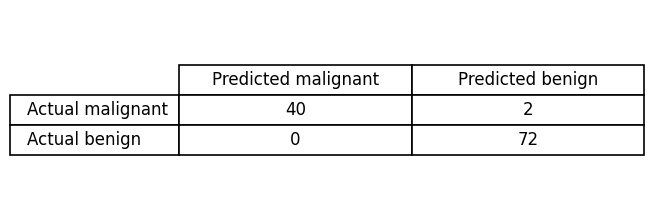

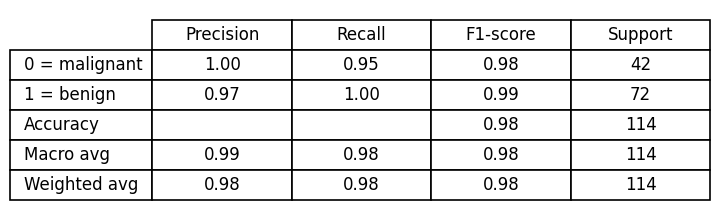

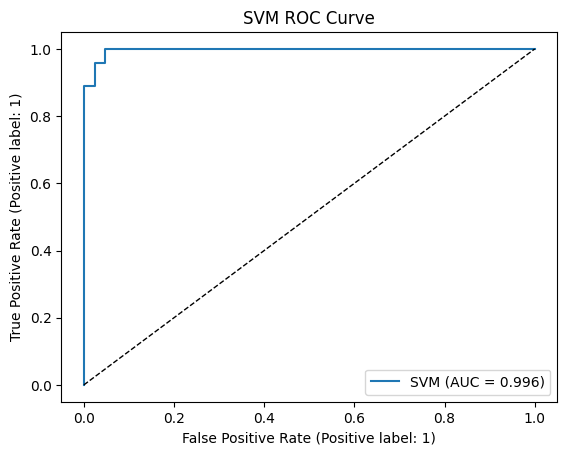

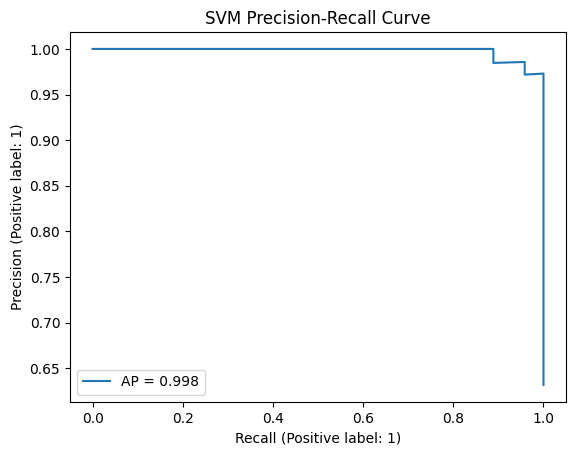

                      weight
mean concave points -0.96726


In [18]:
# your code here
# standardlize the data
scaler = StandardScaler()
X_train_data = scaler.fit_transform(X_train) # get all metrics from train as a standard
X_test_data = scaler.transform(X_test)

# train the model
svm = SVC(kernel = "linear", probability = True, random_state = None)
svm.fit(X_train_data, y_train)

# test with model
y_pred = svm.predict(X_test_data) # classify the data into two categories
y_pred_proba = svm.predict_proba(X_test_data)[:, 1] # for accuracy, toc_auc, precision

# accuracy, roc_auc, average precision
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
average_prec = average_precision_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Average Precision:", average_prec)

# ------------- confusion matrix -------------
matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
#print(matrix)

# set labels
actual = ["Actual malignant", "Actual benign"]
predicted = ["Predicted malignant", "Predicted benign"]

# draw graph
fig, ax = plt.subplots(figsize=(5, 2.6))
ax.axis("off")
tbl = ax.table(cellText = matrix.astype(int).astype(str),
               rowLabels = actual, colLabels = predicted,
               loc = "center", cellLoc = "center")
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.8)
for cell in tbl.get_celld().values():
    cell.set_linewidth(1.2)
plt.show()

# ------------- evaluation -------------
# set labels
col_labels = ["Precision", "Recall", "F1-score", "Support"]
row_labels = ["0 = malignant", "1 = benign", "Accuracy", "Macro avg", "Weighted avg"]

# calculate the metrics
prec, rec, f1, sup = precision_recall_fscore_support(
    y_test, y_pred, labels=[0, 1], zero_division=0
)
acc = accuracy_score(y_test, y_pred)

total = int(sup[0]) + int(sup[1])
# build the table
filled_table = [
    [f"{prec[0]:.2f}", f"{rec[0]:.2f}", f"{f1[0]:.2f}", str(int(sup[0]))],
    [f"{prec[1]:.2f}",  f"{rec[1]:.2f}",  f"{f1[1]:.2f}", str(int(sup[1]))],
    ["", "", f"{acc:.2f}", str(int(sup[0]) + int(sup[1]))],
    [f"{(prec[0] + prec[1]) / 2:.2f}", f"{(rec[0] + rec[1]) / 2:.2f}", f"{(f1[0] + f1[1]) / 2:.2f}", str(total)],
    [f"{((prec[0]*sup[0] + prec[1]*sup[1]) / total):.2f}", f"{((rec[0]*sup[0] + rec[1]*sup[1]) / total):.2f}", f"{((f1[0]*sup[0] + f1[1]*sup[1]) / total):.2f}", str(total)]
]

# draw the graph
fig, ax = plt.subplots(figsize=(6.0, 2.6))
ax.axis("off")
tbl = ax.table(cellText = filled_table,
               rowLabels = row_labels, colLabels = col_labels,
               loc = "center", cellLoc = "center")
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.8)
for cell in tbl.get_celld().values():
    cell.set_linewidth(1.2)
plt.show()

# ------------- ROC curve -------------
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_val = auc(fpr, tpr)

plt.plot(fpr, tpr, label = f"SVM (AUC = {roc_auc_val:.3f})")
plt.plot([0,1],[0,1],'k--',linewidth=1)
plt.xlabel("False Positive Rate (Positive label: 1)")
plt.ylabel("True Positive Rate (Positive label: 1)")
plt.title("SVM ROC Curve")
plt.legend(loc = "lower right")
plt.show()

# ------------- Precision-Recall curve -------------
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, label = f"AP = {average_prec:.3f}")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("SVM Precision-Recall Curve")
plt.legend(loc = "lower left")
plt.show()

# ------------- the most important predictor variable -------------
coefficients = pd.Series(svm.coef_[0], index = feature_names)
importance = coefficients.abs().sort_values(ascending = False)

importance_feacture_table = pd.DataFrame({
    "weight": coefficients.loc[importance.index],
})
print(importance_feacture_table.head(1))